<a href="https://colab.research.google.com/github/jw9603/machine_learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download a data file

In [1]:
!gdown --id 17tVCeR86jzDnpwTkxaxHKXP5k1iWO2T9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17tVCeR86jzDnpwTkxaxHKXP5k1iWO2T9
To: /content/USArrests.csv
100% 1.39k/1.39k [00:00<00:00, 2.80MB/s]


### Import libraries

In [2]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy.stats import chi2
from IPython.display import Image

In [3]:
def plot_cov_ellipse(ax, cov, pos, volume=.5, fc='none', ec=[0, 0, 0], a=1., lw=2.):
    def eigsorted(cov):
        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
        vals, vecs = np.linalg.eigh(cov) # eigenvalue, eigenvector(normalized)
        order = vals.argsort()[::-1] # 내림차순으로 인덱스 반환
        return vals[order], vecs[:, order] # eigenvector의 경우 column이 eigenvalue에 해당하는 eigenvector

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))#degrees() : 라디안 -> 각도
    kwrg = {'facecolor': fc, 'edgecolor': ec, 'alpha': a, 'linewidth': lw}

    width, height = 2 * np.sqrt(chi2.ppf(volume, 2)) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)

    ax.add_artist(ellip)
    return ax

In [6]:
# Load the data file
data = pd.read_csv("./USArrests.csv", header=0)

print(data)

x_mat = data[['Murder', 'Assault']].to_numpy()
print(x_mat.shape) #(50,2)

        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

### K-means

In [7]:
def kmeans_func(x_mat, n_clusters=3, rs=108):
    labels = range(n_clusters)

    kmeans = KMeans(n_clusters=n_clusters, random_state=rs).fit(x_mat)
    preds = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Draw a graph
    plt.figure()
    cmap = matplotlib.cm.get_cmap('Set1')
    for label in labels:
        idx = (preds == label)
        plt.scatter(x_mat[idx, 0], x_mat[idx, 1], color=cmap(label), marker='.')

    plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black')

    file_name = 'kmeans_{}-clusters.png'.format(n_clusters)
    plt.savefig(file_name)

    Image(file_name)

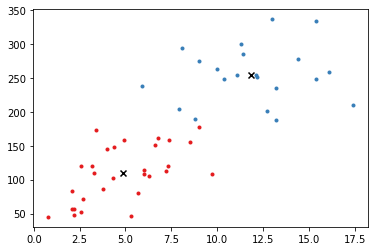

In [8]:
kmeans_func(x_mat, n_clusters=2)

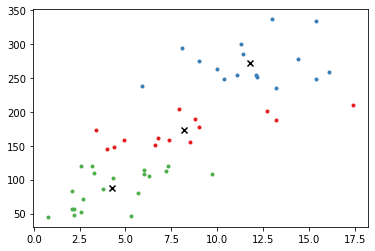

In [9]:
kmeans_func(x_mat, n_clusters=3)

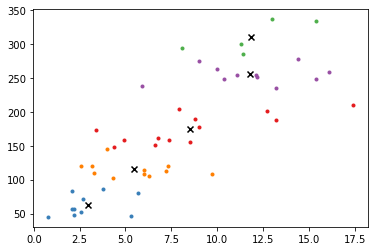

In [10]:
kmeans_func(x_mat, n_clusters=5)

### Gaussian Mixture Model

In [11]:
def gmm_func(x_mat, n_clusters=3, rs=108):
    labels = range(n_clusters)

    gmm = GaussianMixture(n_components=n_clusters, random_state=rs).fit(x_mat)
    means = gmm.means_
    covariancs = gmm.covariances_
    preds = gmm.predict(x_mat)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    cmap = matplotlib.cm.get_cmap('Set1')

    # Scatter plot for each label
    for label in labels:
        idx = (preds == label)
        ax.scatter(x_mat[idx, 0], x_mat[idx, 1], color=cmap(label), marker='.')

        cov = covariancs[label, :, :]
        mus = means[label, :]
        plot_cov_ellipse(ax, cov, mus, volume=.5, fc=cmap(label), a=.5, lw=0)

    file_name = 'gmm_{}-clusters.png'.format(n_clusters)
    plt.savefig(file_name)

    Image(file_name)

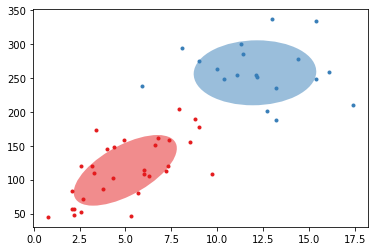

In [12]:
gmm_func(x_mat, n_clusters=2)

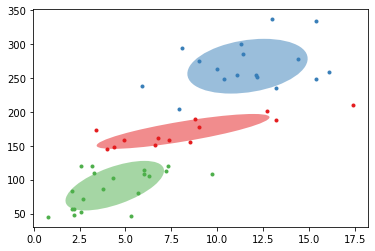

In [13]:
gmm_func(x_mat, n_clusters=3)

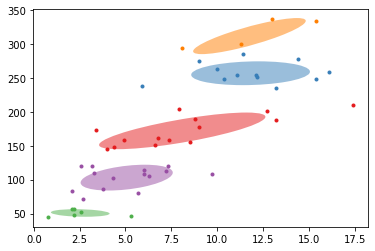

In [14]:
gmm_func(x_mat, n_clusters=5)

### DBSCAN

In [15]:
def dbscan_func(x_mat, eps=25, min_samples=4):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(x_mat)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    cmap = matplotlib.cm.get_cmap('Set1')

    unique_labels = list(set(labels))

    for label in unique_labels:
        idx = (labels == label)

        for jdx in range(len(idx)):
            if idx[jdx]:
                ax.scatter(x_mat[jdx][0], x_mat[jdx][1], color=cmap(label), marker='.')

    file_name = 'dbscan_{}-eps_{}-minpts.png'.format(eps, min_samples)
    plt.savefig(file_name)

    Image(file_name)

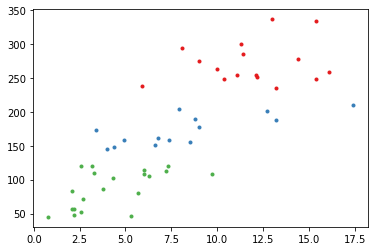

In [16]:
dbscan_func(x_mat, eps=25, min_samples=4)

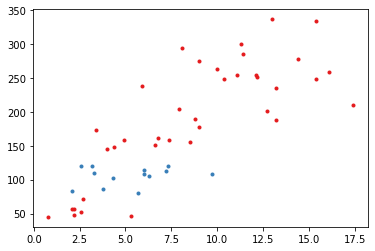

In [17]:
dbscan_func(x_mat, eps=25, min_samples=10)

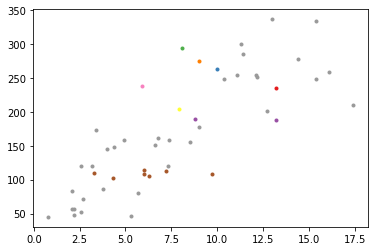

In [26]:
dbscan_func(x_mat, eps=5, min_samples=1)